In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = (12, 6)

## **1. Load the Data and Preview the Data**


In [221]:
df = pd.read_csv("cleaned/restoration_ready_data.csv")

# Preview the Data
print("Data Shape:", df.shape)
print("\nData Head:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Data Shape: (2340, 12)

Data Head:
   DI  TradeValue     RealmType      Enclave  LivingQuarters  ParcelSize  \
0   0    269500.0   Meadowlands  Brightforge          2143.0      7939.0   
1   1    184900.0   Meadowlands  Brightforge           923.0     10083.0   
2   2     87000.0  GnomeBurough  Petalbridge           959.0      9439.0   
3   3    130000.0   Meadowlands   Shadowmere           798.0      3869.0   
4   4    144000.0   Meadowlands  Dragonspire          1172.0     11344.0   

  ParcelSizeUnit  StructuralIntegrity ExteriorCharm  Craftsmanship  \
0           sqft                    5        Common              7   
1           sqft                    5      Gleaming              7   
2           sqft                    5        Common              5   
3           sqft                    6      Gleaming              5   
4           sqft                    5        Common              5   

   EraConstructed  NeedsRestoration  
0            1711             False  
1          

## **2. Distribution of TradeValue**


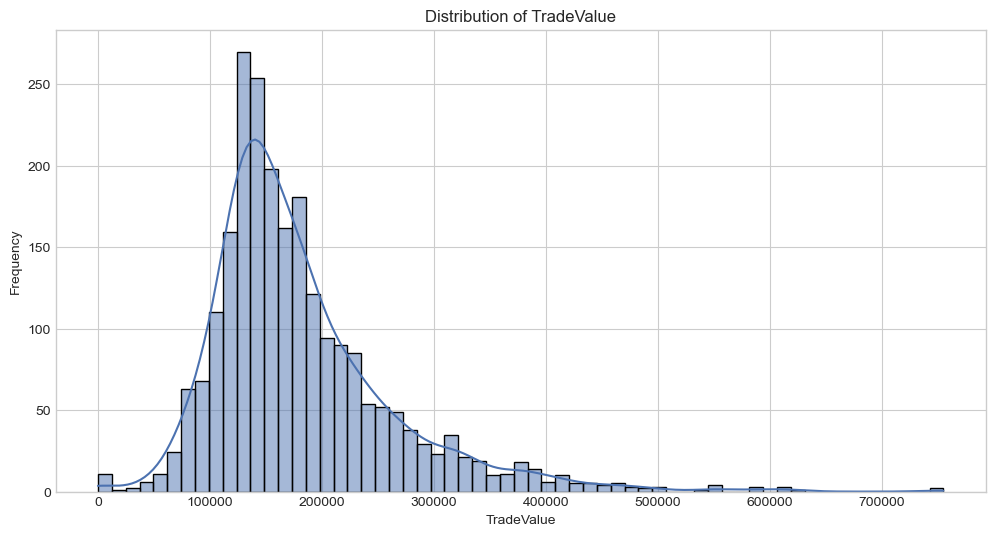

In [222]:
plt.figure()
sns.histplot(df['TradeValue'], kde=True)
plt.title('Distribution of TradeValue')
plt.xlabel('TradeValue')
plt.ylabel('Frequency')
plt.show()

## **3. Explore TradeValue Across Nominal Features**


<h3>Boxplot: TradeValue by RealmType</h3>

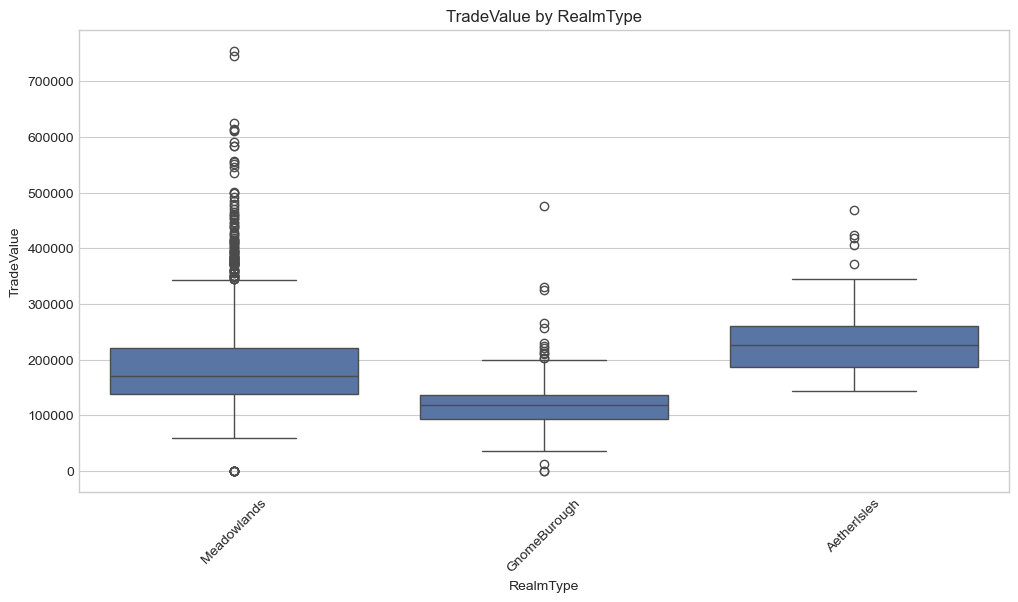

In [223]:
plt.figure()
sns.boxplot(x='RealmType', y='TradeValue', data=df)
plt.title('TradeValue by RealmType')
plt.xlabel('RealmType')
plt.ylabel('TradeValue')
plt.xticks(rotation=45)
plt.show()

<h3>Calculate median TradeValue for each Enclave</h3>

In [224]:
enclave_medians = df.groupby('Enclave')['TradeValue'].median().sort_values()

<h4>Plot in ascending order</h4>

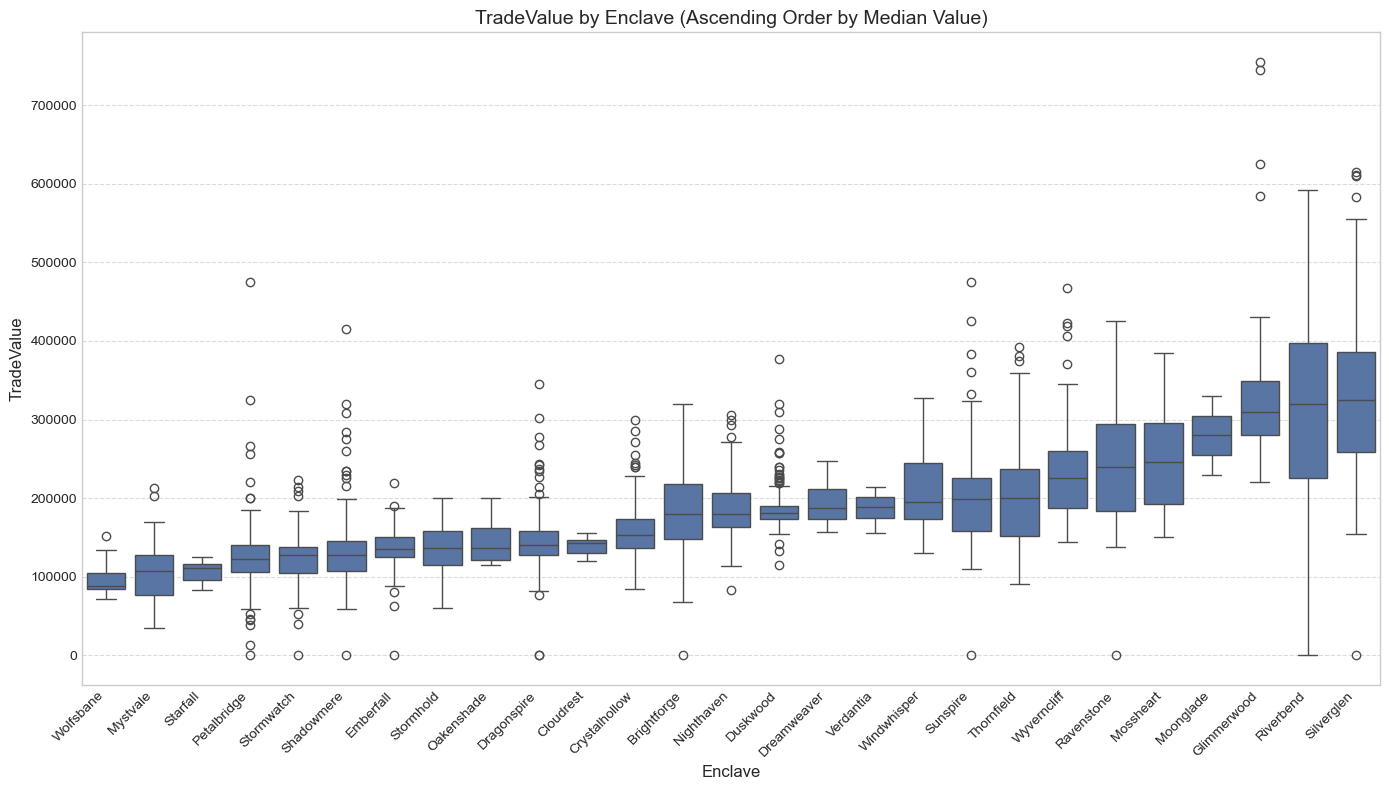

In [225]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Enclave', y='TradeValue', data=df, order=enclave_medians.index)
plt.title('TradeValue by Enclave (Ascending Order by Median Value)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('TradeValue', fontsize=12)
plt.xlabel('Enclave', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('tradevalue_by_enclave_ascending.png')
plt.show()

## **4. Explore Relationships with Numeric Features**

Focus on the following numeric features:
- **LivingQuarters**
- **ParcelSize**
- **StructuralIntegrity**


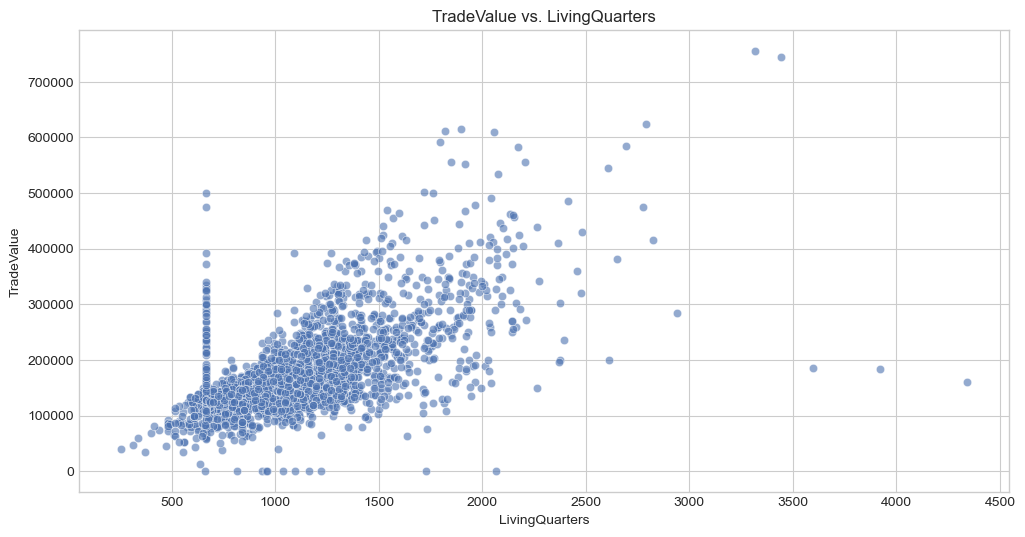

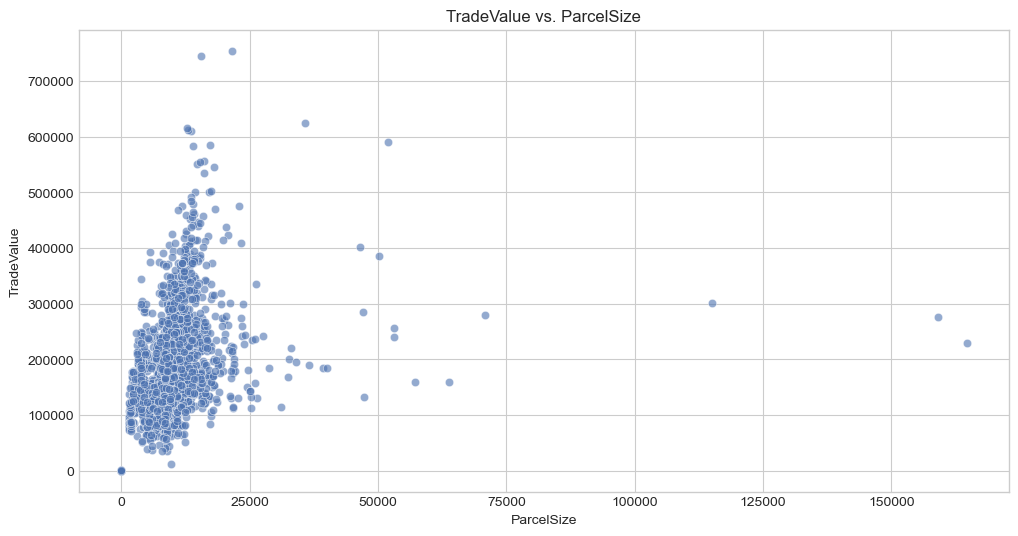

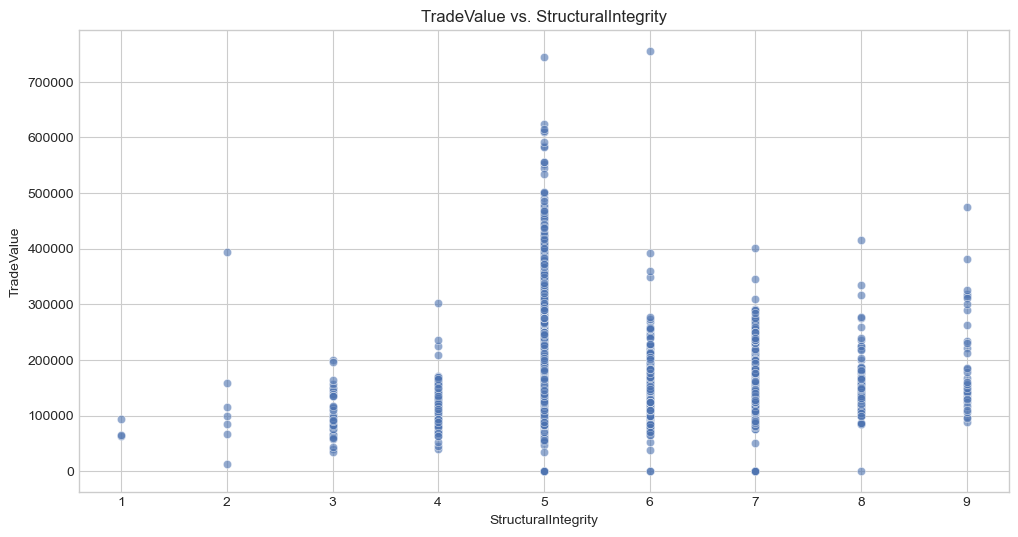

In [226]:
numeric_features = ['LivingQuarters', 'ParcelSize', 'StructuralIntegrity']

for feature in numeric_features:
    plt.figure()
    sns.scatterplot(x=feature, y='TradeValue', data=df, alpha=0.6)
    plt.title(f'TradeValue vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('TradeValue')
    plt.show()


## **5. Explore ExteriorCharm (Ordinal)**

**ExteriorCharm** is stored as strings (e.g., *"Modest"*, *"Common"*, *"Gleaming"*, *"Enchanting"*).
You can visualize how **TradeValue** differs for each category by using a boxplot.


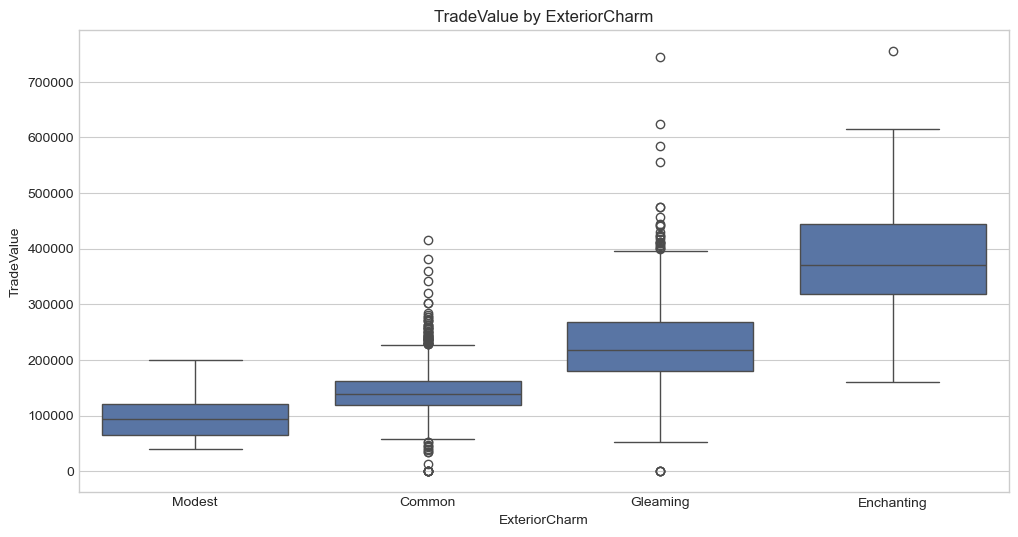

In [227]:
plt.figure()
sns.boxplot(x='ExteriorCharm', y='TradeValue', data=df, order=["Modest", "Common", "Gleaming", "Enchanting"])
plt.title('TradeValue by ExteriorCharm')
plt.xlabel('ExteriorCharm')
plt.ylabel('TradeValue')
plt.show()

## **6. Correlation Matrix (Numeric Features + TradeValue)**

**We only include the following numeric columns:**
- **LivingQuarters**
- **ParcelSize**
- **StructuralIntegrity**
- **TradeValue**


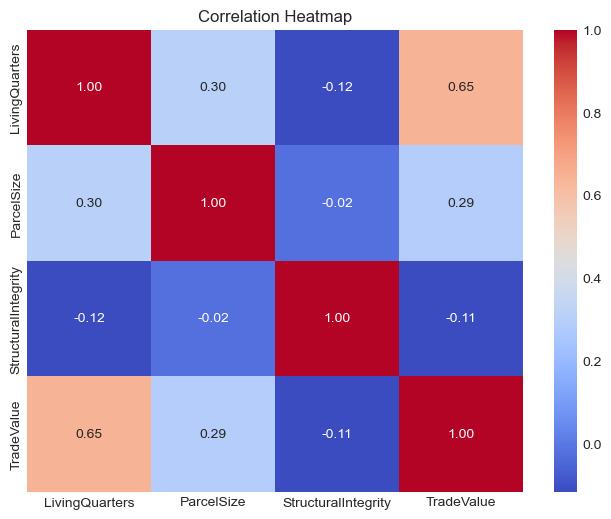

In [228]:
corr_features = ['LivingQuarters', 'ParcelSize', 'StructuralIntegrity', 'TradeValue']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **7. Summary of Observations**

1. **TradeValue Distribution**  
   - **Strong right skew** with significant outliers in the upper range.  
   - A **log transformation** helps normalize the distribution, making it more suitable for regression modeling.  
   - Most properties fall in the **100,000–300,000** range, with premium properties extending to **700,000+**.

2. **RealmType & Enclave Patterns**  
   - **Highest value enclaves:** Silverglen, Emberfall, and Glimmerwood command premium prices.  
   - **Lowest value enclaves:** Crystalhollow, Mystvale, and Stormwatch have more affordable properties.  
   - **Widest price variation:** Riverbend shows the greatest range, suggesting diverse property types.  
   - **Premium outliers:** Most enclaves have high‐value outliers, indicating luxury properties exist even in moderate areas.

3. **LivingQuarters & TradeValue**  
   - **Strong positive correlation (0.65)** – the strongest among numeric predictors.  
   - Relationship appears predominantly **linear** with slight tapering at extremes.  
   - **Higher variance** for larger properties (>2000 square units).  
   - **Core concentration** of properties between 800–1500 square units.  

4. **ParcelSize & TradeValue**  
   - **Moderate positive correlation (0.29)** – weaker than LivingQuarters.  
   - Considerable **variance** across all parcel sizes.  
   - Relationship is more **non‐linear** than with LivingQuarters.  
   - Very large parcels don’t necessarily command proportionally higher prices.  
   - **Location‐dependent effect:** The importance of parcel size varies significantly by enclave.

5. **StructuralIntegrity & TradeValue**  
   - **Slight negative correlation (-0.11)** – contrary to typical expectations.  
   - Buyers may be purchasing properties with lower integrity for **renovation**.  
   - Could also suggest newer, high‐value properties **haven’t yet needed** structural improvements.

6. **ExteriorCharm Effects**  
   - Clear progression in value from **Modest → Common → Gleaming → Enchanting**.  
   - **“Enchanting”** properties command significant price premiums.  
   - Effect remains consistent across different enclaves and realm types.  
   - Converting to an **ordinal scale (1–4)** effectively captures this relationship for modeling.

7. **Interaction Effects**  
   - **Realm–Enclave** combinations show stronger effects than either factor alone.  
   - **Premium enclaves** show a stronger correlation between parcel size and value.  
   - The effect of **LivingQuarters** appears more consistent across locations.  
   - Suggests modeling should include **interaction terms** between location and property characteristics.

# **Real Estate Price Prediction Model with Log Transformation**

## **1. Data Loading and Preparation**


In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned/cleaned_data.csv")

We start by importing essential libraries and loading the cleaned dataset. 
The **pandas** library handles data manipulation, **scikit-learn** provides modeling capabilities, 
and **matplotlib**/**seaborn** will help us visualize results.


## **2. Feature Engineering**

In [230]:
df['LogTradeValue'] = np.log(df['TradeValue'])

charm_mapping = {'Modest': 1, 'Common': 2, 'Gleaming': 3, 'Enchanting': 4}
df['ExteriorCharm_ordinal'] = df['ExteriorCharm'].map(charm_mapping)

df_encoded = pd.get_dummies(df, columns=['RealmType', 'Enclave'], drop_first=False)

This step transforms our data to improve model performance:

- **Log Transformation** of *TradeValue* normalizes the price distribution, 
  as real estate prices typically follow a log-normal distribution.

- Converting **ExteriorCharm** from categorical to ordinal (1–4) 
  captures the natural progression from *Modest* to *Enchanting*.

- **One-Hot Encoding** creates binary columns for each unique value in 
  *RealmType* and *Enclave*, allowing these categorical variables to be 
  used in our linear model.

## **3. Feature Selection**

In [231]:
numeric_features = ['LivingQuarters', 'ParcelSize', 'StructuralIntegrity', 'ExteriorCharm_ordinal']
realm_cols = [col for col in df_encoded.columns if col.startswith('RealmType_')]
enclave_cols = [col for col in df_encoded.columns if col.startswith('Enclave_')]

print("Creating interaction terms...")
interaction_terms = {}

top_enclaves = df['Enclave'].value_counts().head(5).index.tolist()
print(f"Creating interactions for top 5 enclaves: {top_enclaves}")

for enclave in top_enclaves:
    enclave_col = f'Enclave_{enclave}'
    if enclave_col in df_encoded.columns:
        interaction_terms[f'{enclave_col}_X_LivingQuarters'] = df_encoded[enclave_col] * df_encoded['LivingQuarters']
        interaction_terms[f'{enclave_col}_X_ParcelSize'] = df_encoded[enclave_col] * df_encoded['ParcelSize']

interaction_df = pd.DataFrame(interaction_terms)
print(f"Created {len(interaction_terms)} interaction terms")

X_full = pd.concat([
    df_encoded[numeric_features], 
    df_encoded[realm_cols], 
    df_encoded[enclave_cols],
    interaction_df
], axis=1)

y_full = df_encoded['LogTradeValue']

Creating interaction terms...
Creating interactions for top 5 enclaves: ['Dragonspire', 'Sunspire', 'Petalbridge', 'Shadowmere', 'Wyverncliff']
Created 10 interaction terms


Here we select the most important features and create interaction terms:

- **Key Numeric Features**  
  Incorporate *property size*, *structural integrity*, and *aesthetics*, 
  identified from exploratory analysis as strong predictors.

- **Interaction Terms**  
  Between the top 5 enclaves and property characteristics. 
  These interactions capture how property features are valued differently 
  across various neighborhoods – for example, extra living space might be 
  worth more in premium enclaves.


## **4. Outlier Detection and Removal**


In [ ]:
print("Identifying outliers...")
prelim_model = LinearRegression()
prelim_model.fit(X_full, y_full)
y_pred_full = prelim_model.predict(X_full)

residuals = y_full - y_pred_full
residual_std = np.std(residuals)
outlier_threshold = 2.5 * residual_std
outliers = np.abs(residuals) > outlier_threshold

print(f"Number of outliers detected: {np.sum(outliers)}")
print(f"Percentage of data identified as outliers: {np.sum(outliers) / len(residuals) * 100:.2f}%")

X_clean = X_full[~outliers].reset_index(drop=True)
y_clean = y_full[~outliers].reset_index(drop=True)

print(f"Data shape before outlier removal: {X_full.shape}")
print(f"Data shape after outlier removal: {X_clean.shape}")

Identifying outliers...
Number of outliers detected: 12
Percentage of data identified as outliers: 0.51%
Data shape before outlier removal: (2340, 44)
Data shape after outlier removal: (2328, 44)


Outlier detection improves model robustness:

- We train a preliminary model and identify properties with residuals more than 2.5 standard deviations from the mean.

- These outliers are unusual transactions that don't follow typical market patterns (like distressed sales or family transfers).

- Removing them helps the model better capture normal market dynamics rather than being influenced by exceptional cases.


## **5. Train-Test Split and Model Training**


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

We split our cleaned data into training (80%) and testing (20%) sets:

- The `random_state` parameter ensures reproducibility of results.

- We use a standard linear regression model, which works well with our log-transformed target.

- The model learns the relationship between our features and `log(TradeValue)`.


## **6. Model Evaluation**


In [234]:
y_pred_log = model.predict(X_test)
y_test_orig = np.exp(y_test)
y_pred_orig = np.exp(y_pred_log)

log_mse = mean_squared_error(y_test, y_pred_log)
log_mae = mean_absolute_error(y_test, y_pred_log)
log_r2 = r2_score(y_test, y_pred_log)

print("\nModel Evaluation (Log Scale) with interaction terms:")
print(f"Mean Squared Error: {log_mse:.4f}")
print(f"Mean Absolute Error: {log_mae:.4f}")
print(f"R² Score: {log_r2:.4f}")

orig_mse = mean_squared_error(y_test_orig, y_pred_orig)
orig_mae = mean_absolute_error(y_test_orig, y_pred_orig)
orig_r2 = r2_score(y_test_orig, y_pred_orig)

print("\nModel Evaluation (Original Scale) with interaction terms:")
print(f"Mean Squared Error: {orig_mse:.2f}")
print(f"Mean Absolute Error: {orig_mae:.2f}")
print(f"R² Score: {orig_r2:.4f}")


Model Evaluation (Log Scale) with interaction terms:
Mean Squared Error: 0.0302
Mean Absolute Error: 0.1290
R² Score: 0.8035

Model Evaluation (Original Scale) with interaction terms:
Mean Squared Error: 1276147402.80
Mean Absolute Error: 23691.88
R² Score: 0.8010


We evaluate our model on both logarithmic and original scales:

- **Log scale metrics** show how well the model captures percentage differences in prices.

- **Original scale metrics** (after exponential transformation) show the actual currency units of error.

- **R²** represents the proportion of variance explained by the model.

- **MAE (Mean Absolute Error)** is particularly interpretable as the average prediction error in currency units.


## **7. Visualization**


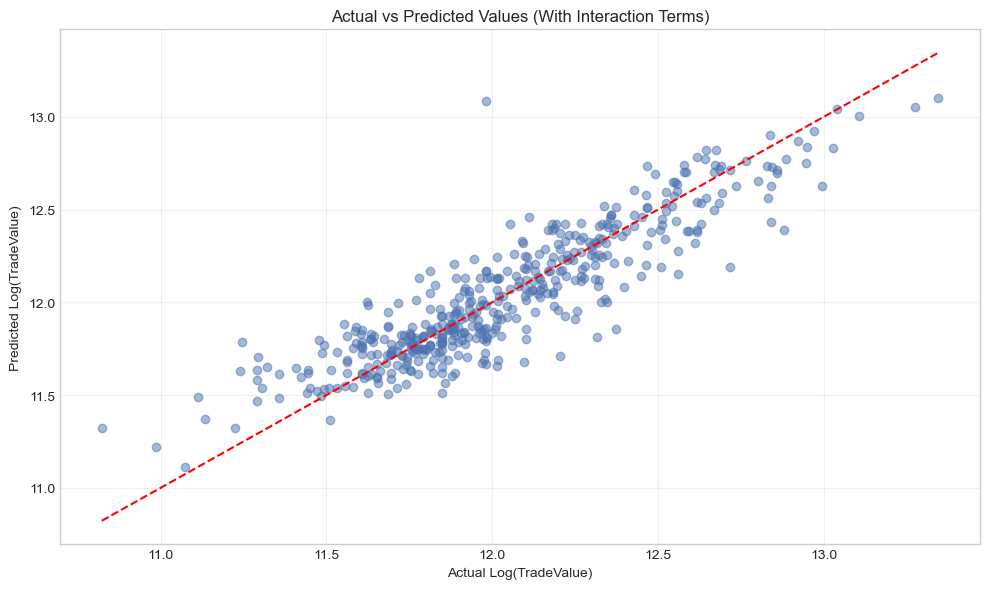

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_log, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Log(TradeValue)')
plt.ylabel('Predicted Log(TradeValue)')
plt.title('Actual vs Predicted Values (With Interaction Terms)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('model_performance_interactions.png')
plt.show()

This visualization shows model performance:

- Each point represents a property with its actual vs predicted log price.

- Points close to the red diagonal line indicate accurate predictions.

- The scatter pattern helps identify any systematic bias or areas of poor prediction.

- A tight cluster along the diagonal indicates a well-performing model.


## **8. Feature Importance Analysis**


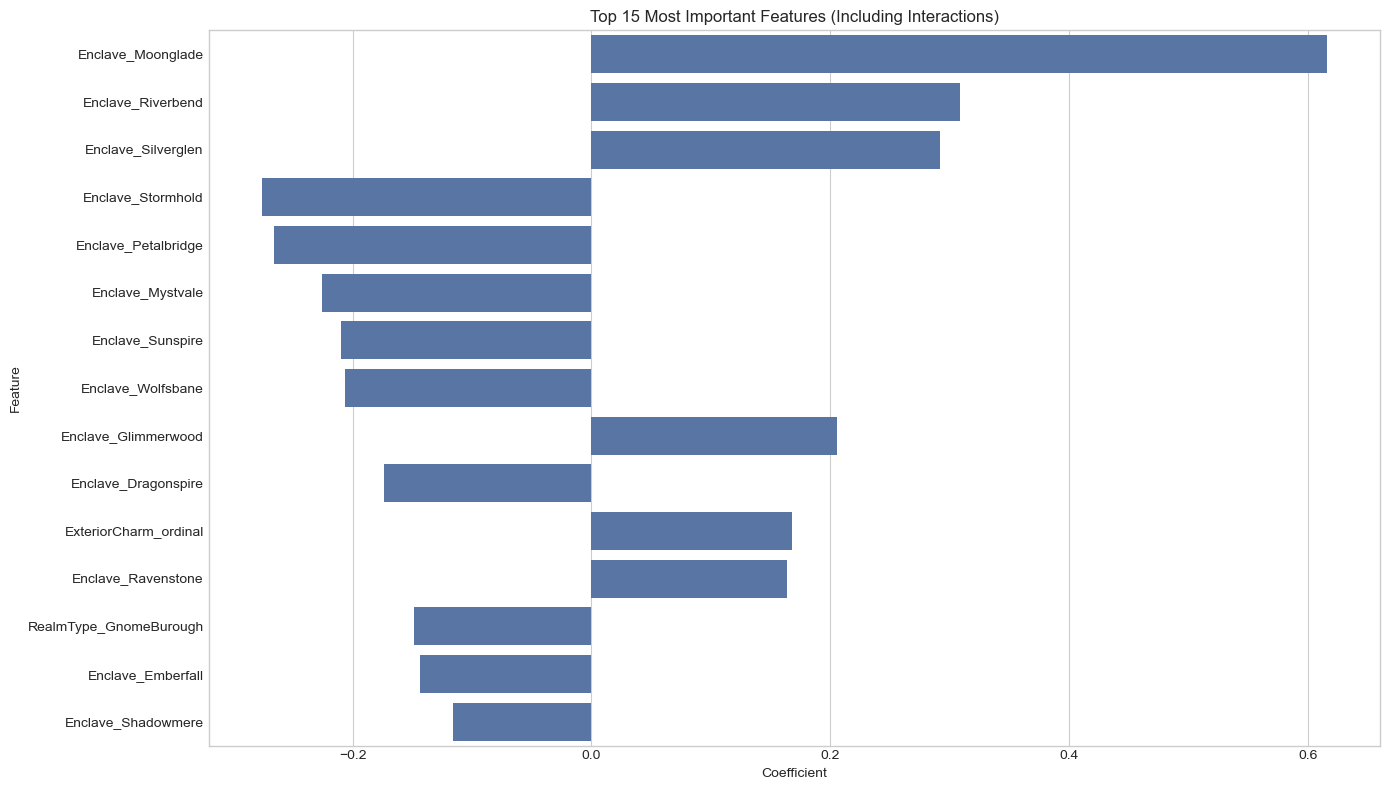


Interaction Term Coefficients:
                                 Feature  Coefficient  Abs_Coefficient
40   Enclave_Shadowmere_X_LivingQuarters    -0.000167         0.000167
42  Enclave_Wyverncliff_X_LivingQuarters    -0.000163         0.000163
36     Enclave_Sunspire_X_LivingQuarters     0.000115         0.000115
34  Enclave_Dragonspire_X_LivingQuarters    -0.000038         0.000038
43      Enclave_Wyverncliff_X_ParcelSize     0.000037         0.000037
38  Enclave_Petalbridge_X_LivingQuarters     0.000031         0.000031
37         Enclave_Sunspire_X_ParcelSize     0.000012         0.000012
39      Enclave_Petalbridge_X_ParcelSize     0.000011         0.000011
35      Enclave_Dragonspire_X_ParcelSize     0.000008         0.000008
41       Enclave_Shadowmere_X_ParcelSize     0.000003         0.000003


In [ ]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
top_features = coefficients.sort_values('Abs_Coefficient', ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_features)
plt.title('Top 15 Most Important Features (Including Interactions)')
plt.tight_layout()
plt.savefig('feature_importance_interactions.png')
plt.show()

interaction_coeffs = coefficients[coefficients['Feature'].str.contains('_X_')].sort_values('Abs_Coefficient', ascending=False)
print("\nInteraction Term Coefficients:")
print(interaction_coeffs)

Feature importance analysis reveals what drives property values:

- **Coefficient magnitude** shows how strongly each feature influences price.

- **Positive coefficients** increase price, **negative ones** decrease it.

- **Interaction terms** with large coefficients indicate locations where property characteristics have significantly different values.

- This analysis helps identify the most influential factors in property valuation.
